# PROGRAM 30
### Aim  : Multilayer Perceptron 
### Date : 04/11/2022
### By    : Anu C Scharia

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [71]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x=df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [75]:
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[0.         0.76262626 0.73770492 ... 0.62742176 0.12285959 0.        ]
 [0.05882353 0.41919192 0.55737705 ... 0.27123696 0.23116438 0.1       ]
 [0.11764706 0.61616162 0.57377049 ... 0.54843517 0.10958904 0.1       ]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02739726 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09246575 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.2380137  0.8       ]]


In [76]:
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
classifier.fit(x_train,y_train)
x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

In [77]:
print(y_test.values)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1]


In [78]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix of testing \n",cm)
cm2=confusion_matrix(y_train,x_pred)
print("confusion matrix of training \n",cm2)

confusion matrix of testing 
 [[137  20]
 [ 32  42]]
confusion matrix of training 
 [[303  40]
 [ 68 126]]


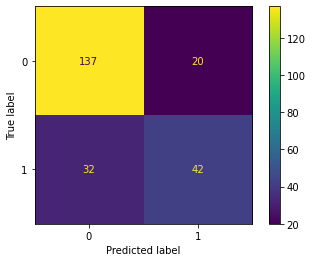

In [79]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: {}'.format(precision_score(y_test,y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test,y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test,y_pred,pos_label=0)))

Accuracy score: 0.7748917748917749
Precision score: 0.8106508875739645
Recall score: 0.8726114649681529
F1 score: 0.8404907975460123


In [81]:
classifier.coefs_

[array([[-1.29836298e-03,  5.48321606e-01,  4.34575531e-25,
          3.50309422e-01, -7.84050788e-04,  2.19957918e-01,
          4.94498914e-01,  1.84697960e-03],
        [ 8.75912067e-01,  7.22188268e-01, -5.60802397e-03,
         -4.82161094e-01, -1.53326866e-02,  1.05273350e-01,
         -5.83432777e-01, -1.26750719e-03],
        [ 3.68330326e-01, -1.94544779e-01,  6.80875464e-04,
         -5.01686844e-01, -2.68896693e-08, -3.21722015e-01,
          1.28261827e-01,  1.77195185e-30],
        [-4.69105479e-01,  6.40517000e-01, -8.42106350e-11,
          7.40491284e-02,  6.10876679e-21,  6.32541363e-02,
          6.38924543e-01, -6.16445557e-03],
        [-4.77491100e-01,  3.00012781e-01,  7.33672149e-03,
          1.79734728e-01, -3.92841209e-03, -2.89142543e-01,
          6.43085086e-01, -1.04627745e-23],
        [ 2.54578140e-01,  4.68132312e-01, -5.92473419e-11,
          2.50770841e-01,  1.65811737e-22,  2.30711591e-01,
         -5.10946801e-01, -1.55122409e-06],
        [-2.3159

In [82]:
classifier.intercepts_

[array([ 0.73985568, -0.45283653, -0.34349006, -0.30722123, -0.55803068,
        -0.38206794,  0.90913073, -0.53740368]),
 array([ 0.45688166,  0.37694879, -0.07712365,  0.05074006,  0.32616479,
         0.04102639, -0.45047049, -0.55337023]),
 array([ 0.35912029,  0.28758248, -0.17340956,  0.07558236,  0.14057169,
        -0.24147418, -0.2864592 , -0.37815337]),
 array([-0.42463948])]